# Import the library

In [2]:
import numpy as np
import numpy.random as npr

### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [3]:
m = np.arange(12).reshape((3,4))
print("Row mean")
for i in range(3):
    print(np.mean(m[i,:]))
print("Row column")
for i in range(4):
    print(np.mean(m[:,i]))
print("Mean")
print(np.mean(m))

Row mean
1.5
5.5
9.5
Row column
4.0
5.0
6.0
7.0
Mean
5.5


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [4]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

out = np.zeros((4,4))
for i in range(len(u)):
    for j in range(len(u)):
        out[i,j] = u[i]*v[j]
uu = u.reshape(4,1)
print(uu*v)

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [5]:
x = np.array(npr.random((10,6)))
for i in range(10):
    if np.any([j<=0.1 for j in x[i,:]]):
        x[i,:] = 0

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  1. Extract every 10th element using slice notation
  2. Reverse the array using slice notation
  3. Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  4. Make a plot showing the sin and cos functions and indicate where they are close

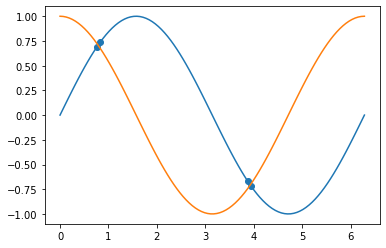

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
x = np.linspace(0,2*np.pi,100)
# 1.
d = x[::10] 
# 2.
f = x[::-1]
# 3.
mask = np.abs(np.sin(x)-np.cos(x))<=0.1
g    = x[mask]
# 4.
plt.plot(x,np.sin(x))
plt.plot(x,np.cos(x))
# Where abs(sin(x[i]-cos(x[i]))) is less than 0.1 
plt.scatter(x[mask],np.sin(x[mask]))
plt.show()

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [7]:
mult_table = np.array(np.arange(1,11))
for i in range(2,11):
    mult_table = np.vstack((mult_table,np.arange(i,i*10+1,i)))

e         = np.trace(mult_table)
antidiag  = [mult_table[i,j] for i in range(10) for j in range(10) if i+j == 9]
upperdiag = [mult_table[i,j+1] for i in range(10) for j in range(10) if i == j and i!=9]

6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [8]:
position  = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
distances = abs(np.reshape(position, (len(position),1))-position)
distancesSI = distances*1.60934

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [9]:
from time import time

def primes(n):
    import numpy as np
    mask = np.ones(n,dtype=bool)
    for i in range(2,n-1):
        for j in range(i+1,n):
            if mask[i]== False:
                break
            else:
                if j%i==0:
                    mask[j]=False
    mask[0] = False
    mask[1] = False
    primes  = np.where(mask == True)

    return list(primes[0])
    
def SieveOfEratosthenes(n): 
  
    prime = [True for i in range(n + 1)] 
    
    p = 2
    while (p * p <= n): 
        if (prime[p] == True):            
            for i in range(p * 2, n + 1, p): 
                prime[i] = False
        p += 1
    
    prime[0]= False
    prime[1]= False
    
    d = []
    for p in range(n + 1): 
        if prime[p]: 
             d.append(p)
    return d
# This part of the cell stands for the time analisys is commented because the run took a 'bit' of time
#primetimes = np.zeros(990)
#sievetimes = np.zeros(990)
#k = 0
#for i in range(99,9999,10):
#    t1 = time()
#    primes(i)
#    t2 = time()
#    primetimes[k] = t2-t1
#    t1 = time()
#    SieveOfEratosthenes(i)
#    t2 = time()
 #   sievetimes[k] = t2-t1
 #   k += 1
 #   if k%100 == 0:
 #       print(k)
#plt.plot(range(0,990),sievetimes,label="Sieves of Eratosthenes time (s)")
#plt.plot(range(0,990),primetimes,label="Prime algorithm time (s)")

The first algorithm seems $\propto t^2$, the sieve of Eratosthenes seems $\propto \sqrt{t}$

8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?
Yes, the mean of the random walk go like the $\sqrt{t}$ and the plot seems to confirm the theory. 

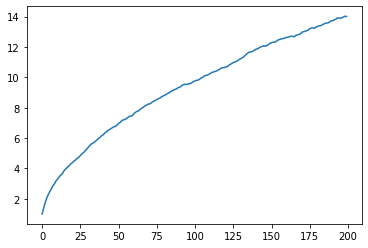

In [16]:
randomwalk          = np.zeros((1000,200))
randomwalk_distance = np.zeros((1000,200))
for i in range(1000):
    for j in range(200):
        if npr.randint(0,2) == 1:
            randomwalk[i,j]          = 1
            randomwalk_distance[i,j] = randomwalk_distance[i,j-1] + 1
        else:
            randomwalk[i,j]          = -1
            randomwalk_distance[i,j] = randomwalk_distance[i,j-1] - 1  
randomwalk_distance=randomwalk_distance**2
meanwalk = np.zeros(200)
for i in range(200):
    meanwalk[i] = np.mean(randomwalk_distance[:,i])
plt.plot(range(200),meanwalk**.5)
plt.show()

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

It seems to be a shift in the max of lynxes and hares, because lynxes eat hares. If the first population drops ( there are less predators) the second increases, if the second increase the first increases the next years, because they have something to eat, the hares eaten are more, so the hares population drop.

In [47]:
! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt

--2020-10-31 12:15:10--  https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.1, 2620:100:6025:1::a27d:4501
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/3vigxoqayo389uc/populations.txt [segue]
--2020-10-31 12:15:11--  https://www.dropbox.com/s/raw/3vigxoqayo389uc/populations.txt
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://ucd6e40ce580be87dcd52754f35c.dl.dropboxusercontent.com/cd/0/inline/BCQWiAYPWK5Ig6Jj-4FxDKmV20z98gtDJFnXv_3e3AFwg3erSyWSe9yeHfaKKl8_lXEDEd9RhuRo0ZTLQOpnZ_6kQckDZjr-zHB7vzmDzzEAUw/file# [segue]
--2020-10-31 12:15:11--  https://ucd6e40ce580be87dcd52754f35c.dl.dropboxusercontent.com/cd/0/inline/BCQWiAYPWK5Ig6Jj-4FxDKmV20z98gtDJFnXv_3e3AFwg3erSyWSe9yeHfaKKl8_lXEDEd9RhuRo0ZTLQOpnZ_6kQckDZjr-z

In [17]:
population = np.loadtxt('populations.txt',comments='#', skiprows=1) 
years   = np.zeros(20)
hares   = np.zeros(20)
lynxes  = np.zeros(20)
carrots = np.zeros(20)
years   = population[:,0]
hares   = population[:,1]
lynxes  = population[:,2]
carrots = population[:,3]

# Plots


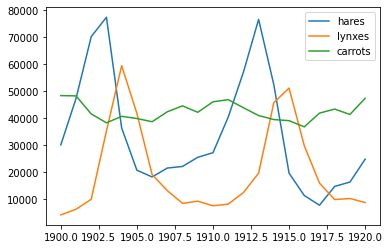

In [20]:
plt.plot(years,hares, label='hares')
# plt.show()
plt.plot(years,lynxes,label='lynxes')
# plt.show()
plt.plot(years,carrots,label='carrots')
plt.legend()
plt.show()

# Main Statistical propreties

The mean of the hares is  34080.95238095238 
 The standard deviation is  20897.906458089667
The mean of the lynxes is  20166.666666666668 
 The standard deviation is  16254.591536908763
The mean of the carrots is  42400.0 
 The standard deviation is  3322.5062255844787


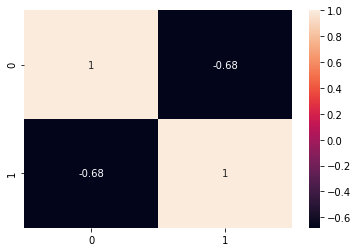

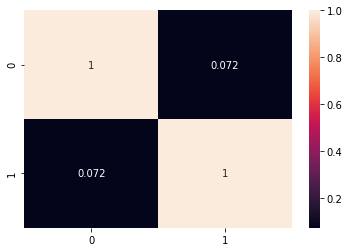

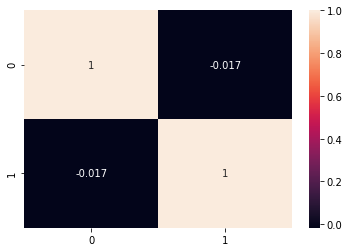

In  1900.0  the max population are carrots.
In  1901.0  the max population are carrots.
In  1902.0  the max population are hares.
In  1903.0  the max population are hares.
In  1904.0  the max population are lynxes.
In  1905.0  the max population are lynxes.
In  1906.0  the max population are carrots.
In  1907.0  the max population are carrots.
In  1908.0  the max population are carrots.
In  1909.0  the max population are carrots.
In  1910.0  the max population are carrots.
In  1911.0  the max population are carrots.
In  1912.0  the max population are hares.
In  1913.0  the max population are hares.
In  1914.0  the max population are hares.
In  1915.0  the max population are lynxes.
In  1916.0  the max population are carrots.
In  1917.0  the max population are carrots.
In  1918.0  the max population are carrots.
In  1919.0  the max population are carrots.


In [19]:
print("The mean of the hares is ",np.mean(hares),"\n", "The standard deviation is ",np.std(hares))
print("The mean of the lynxes is ",np.mean(lynxes),"\n", "The standard deviation is ",np.std(lynxes))
print("The mean of the carrots is ",np.mean(carrots),"\n", "The standard deviation is ",np.std(carrots))

C = np.corrcoef(lynxes,carrots)
import seaborn as sns

import matplotlib.pyplot as plt


sns.heatmap(C, annot = True)
plt.show()
C = np.corrcoef(lynxes,hares)
sns.heatmap(C, annot = True)
plt.show()
C = np.corrcoef(hares,carrots)
sns.heatmap(C, annot = True)

plt.show()
c = 0
for i in range(20):
    if max(hares[i],carrots[i],lynxes[i])== hares[i]:
        print("In ", years[i] , " the max population are hares.")
    elif max(hares[i],carrots[i],lynxes[i])== lynxes[i]:
        print("In ", years[i] , " the max population are lynxes.")
    else :
        print("In ", years[i] , " the max population are carrots.")
    